
#Task

1. You have to implement K-means clustering algorithm with the iris data with 3 dimensions.

2. A sample implementation file is provided. Please download it. You can use notebook to complete the TODOs. The implementation file is actually a skeleton or pseudocodes. You need to fill up your code blocks where asked. Numpy array has been used to store the datapoints, centroids, indices in this skeleton.

3. At first, data are loaded. You can use the load function or panda function to load numerical data in numpy matrix. Use K = 3

4. Use initialize_centroids_simple() to initialize your centroids. This is the simple assignment function you need to implement. Randomly select K points from the sampled data and assign them as initialized centroids.

5. Then, in the kmeans function,

a. You have to calculate the cluster_affiliation array based on the distance of each data points from all centroids.

b. you have to write your own code to count the number of points assigned for each cluster based on the cluster_affiliation and store in the defined structure clutser_point_count

c. You have to re-compute the centroids based on the cluster_affiliation and clutser_point_count

d. Then write your own code to terminate the process based on the termination criteria discussed in the class. We evaluate the quality of the clustering using the clustering objective

Where N is the total number of sampled points. xi is the ith data point. zk is the centroid for kth cluster. The algorithm is terminated when J is nearly equal in two successive iterations (e.g., we terminate when |J − Jprev| ≤ 10−5J, where Jprev is the value of J after the previous iteration, flag = False).

e. In the main function, draw a 3D plot where:

i. plot the data points. Points in different clusters will have different colors. Such as for cluster 0: use blue, for cluster 1: red, cluster 2: yellow

ii. Using the ClassLabel data, determine the shape of the each data point (triangle, square or circle).

iii. Visually calculate how many data points are wrongly clustered where most of the data points are same in a cluster.

In [ ]:
# @title Libraries
import random
import math
import json
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# @title Download dataset
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 'iris.data')
!ls

iris.data  sample_data


**This is the pseudocode loads data from file and save in the numpy matrix. You can also use panda to read the dataset into numpy matrix. data matrix will have data points. Columns have features. Rows have data points  ClassLabel has the labels.**

In [ ]:
def load(file_name):
  dataset = pd.read_csv(file_name, header = None)
  data = dataset.iloc[:,0:-1].to_numpy()
  classLabel = dataset.iloc[:,4].to_numpy()
  return data, classLabel

**Simple centroid initialization function**

In [ ]:
def initialize_centroids_simple(data, dimension, k):
    #centroids: [[centroid0:  3 dimensions, , , ]; [centroid1: 3 dimensions ] ... ..]
    centroids = []
    for _ in range(k):
        centroid = []
        for _ in range(dimension):
            centroid.append(0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    #TO DO
    #Write your code to return initialized centroids by randomly assiging them to K points
    constant_seed = 50  # Set your desired constant seed value here
    np.random.seed(constant_seed)  # Set the constant seed
    centroids_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_indices, :]
    return centroids

In [ ]:
def initialize_centroids_simple(data, dimension, k):
    # Initialize an empty list to store the centroids
    centroids = []

    # Generate k unique random indices between 0 and the number of data points
    random_indices = np.random.permutation(data.shape[0])[:k]

    # Use the randomly selected indices to extract the corresponding data points as centroids
    for index in random_indices:
        centroids.append(data[index])

    # Convert the centroids list to a numpy array
    centroids = np.array(centroids)

    return centroids

# Example usage:
# data is your input data, dimension is the dimensionality of your data points, and k is the number of centroids
# initialized_centroids = initialize_centroids_simple(data, dimension, k)


**Centroid initilization using min max**

In [ ]:
def initialize_centroids(data, dimension, k):

    centroids = []
    for _ in range(k):
        centroid = []
        for _ in range(dimension):
            centroid.append(0)
        centroids.append(centroid)
    centroids = np.array(centroids)

    max_feature_vals =  np.array([0 for _ in range(dimension)])

    min_feature_vals =  np.array([float('inf') for _ in range(dimension)])

    # TO DO
    # Calculate max feature and min feture value for each dimension
    #diff: max - min for each dimension
    for d in range(dimension):
        max_feature_vals[d] = max(data[:, d])
        min_feature_vals[d] = min(data[:, d])
    # for each centroid, in each dimension assign centroids[j][i] = min_feature_val + diff * random.uniform(1e-5, 1)
    for j in range(k):
        for i in range(dimension):
            diff = max_feature_vals[i] - min_feature_vals[i]
            centroids[j][i] = min_feature_vals[i] + diff * random.uniform(1e-5, 1)

    return centroids

**Calculate eucledian distance**

In [ ]:
def get_euclidean_distance(p1, p2):
    #TODO
    #Write your code
    distance = np.sqrt(np.sum((p1 - p2) ** 2))
    return distance

**KMeans Function**


In [ ]:
def kmeans(data, dimension, k):
    N = np.size(data, 0)
    #centroids: [[centroid0:  , , ,3 dimensions, , , ],  [centroid1: , , ,3 dimensions, , , ],  ... ..]
    centroids = initialize_centroids_simple(data, dimension, k)
    #cluster_affiliation: cluster_affiliation = [clusternumber, clutsernumber, ..., ..., ..., ...]

    #initialize the cluster affiliations. Initially assign -1
    #cluster_affiliation = np.array([-1 for _ in range(0, N)])
    cluster_affiliation = np.full(N, -1)
    flag = 1
    Jprev = 0
    while flag:
        #find closest centroids for each data points
        distances = []
        for point in data:
            distances_to_centroids = []
            for centroid in centroids:
                distance = get_euclidean_distance(point, centroid)
                distances_to_centroids.append(distance)
            distances.append(distances_to_centroids)
        distances = np.array(distances)


        #record or update cluster for each data points
        cluster_affiliation = np.argmin(distances, axis=1)

        #recompute centroids
        # new centroids initialized with 0
        centroids = []

        for _ in range(k):
            centroid = []
            for _ in range(dimension):
                centroid.append(0)
                centroids.append(centroid)
        centroids = np.array(centroids)

        #keep number of points for each cluster. You should use cluster_affiliation to calculate it

        #TO DO
        #write your code to count each cluster pointcount and store them in cluster_point_count structure
        cluster_point_count = np.bincount(cluster_affiliation, minlength=k)

        #TODO
        #recompute centroids using the count
        for i in range(k):
            if cluster_point_count[i] > 0:
                centroids[i] = np.mean(data[cluster_affiliation == i], axis=0)

        #TODO
        #write your own code  to terminate the process based on the termination criteria. We evaluate the quality
        #of the clustering using the clustering objective discussed in the class.
        #we terminate when |J − Jprev| ≤ math.power(10,−5)*J, where Jprev is the value of J after the previous iteration).
        #Set flag = 0 if |J − Jprev| ≤ math.power(10,−5)*J

        J = np.sum(np.min(distances, axis=1))/N
        if abs(J - Jprev) <= 1e-5 * J:
            flag = 0
        Jprev = J
    return (centroids, cluster_affiliation)

**Driver funtion/Main Function**

In [ ]:
def main():
    #input path of the real data
    #data file contains point index, 4 features, and class label in each line separated by comma
    K = 3 # K clusters

    inputfilename = '/content/iris.data'
    data, ClassLabel = load(inputfilename)
    dimension = np.size(data, 1)# number of  data dimension in the data
    #dimension = dimension - 1 # We are using 3 dimensions but the data set has been trimmed beforehand
    #numpy array: centroids =  [[centroid0:  , , ,3 dimensions, , , ]; [centroid1: , , ,3 dimensions, , , ] ... ..]
    #numpy array: cluster_affiliation = [clusternumber, clutsernumber, ..., ..., ..., ...]
    centroids, cluster_affiliation = kmeans(data, dimension, K)
    return data, ClassLabel, centroids, cluster_affiliation

if __name__ == "__main__":
	  data, classLabel, centroids, cluster_affiliation = main()

**3D Plotting the K-means Algorithm Result**

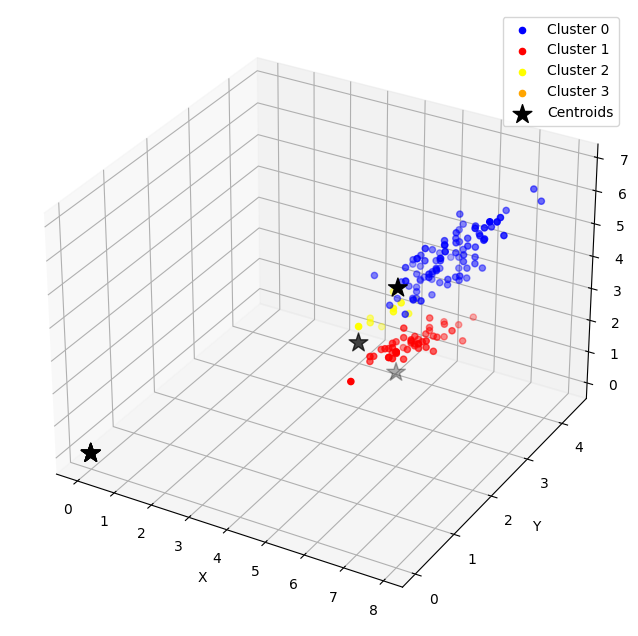

In [ ]:
# Plot the data points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# Data Points
cluster_0_points = data[cluster_affiliation == 0]
cluster_1_points = data[cluster_affiliation == 1]
cluster_2_points = data[cluster_affiliation == 2]
cluster_3_points = data[cluster_affiliation == 3]

ax.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], cluster_0_points[:, 2], c='blue', label='Cluster 0')
ax.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], cluster_1_points[:, 2], c='red', label='Cluster 1')
ax.scatter(cluster_2_points[:, 0], cluster_2_points[:, 1], cluster_2_points[:, 2], c='yellow', label='Cluster 2')
ax.scatter(cluster_3_points[:, 0], cluster_3_points[:, 1], cluster_3_points[:, 2], c='orange', label='Cluster 3')

# Centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', s=200, marker='*', label='Centroids')

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

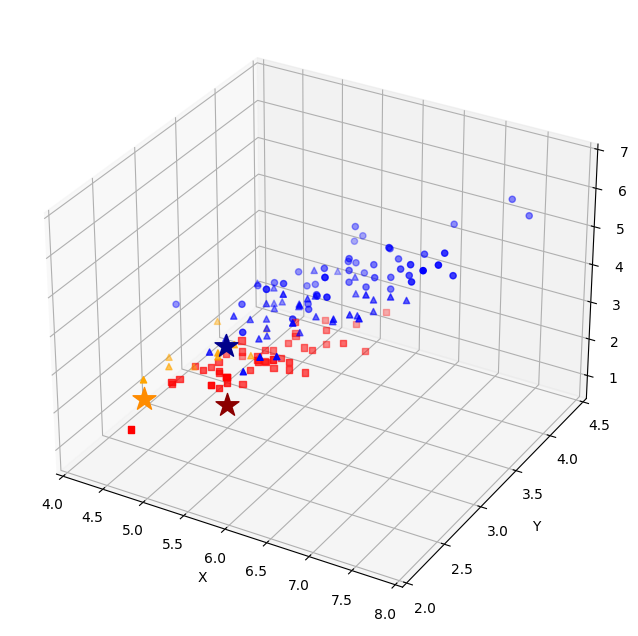

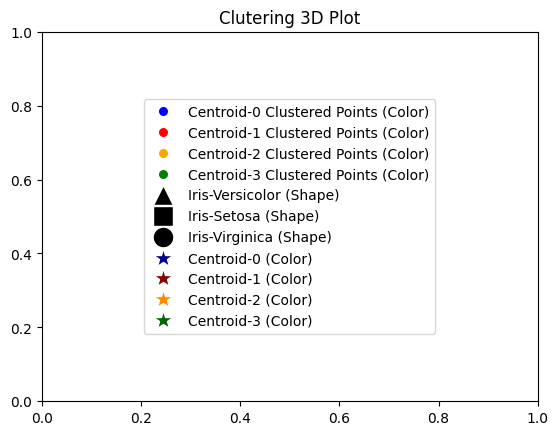

In [ ]:
cluster_0_versi = data[(cluster_affiliation == 0) & (classLabel=='Iris-versicolor')]
cluster_0_setosa = data[(cluster_affiliation == 0) & (classLabel=='Iris-setosa')]
cluster_0_virginica = data[(cluster_affiliation == 0) & (classLabel=='Iris-virginica')]

cluster_1_versi = data[(cluster_affiliation == 1) & (classLabel=='Iris-versicolor')]
cluster_1_setosa = data[(cluster_affiliation == 1) & (classLabel=='Iris-setosa')]
cluster_1_virginica = data[(cluster_affiliation == 1) & (classLabel=='Iris-virginica')]

cluster_2_versi = data[(cluster_affiliation == 2) & (classLabel=='Iris-versicolor')]
cluster_2_setosa = data[(cluster_affiliation == 2) & (classLabel=='Iris-setosa')]
cluster_2_virginica = data[(cluster_affiliation == 2) & (classLabel=='Iris-virginica')]

cluster_3_versi = data[(cluster_affiliation == 3) & (classLabel=='Iris-versicolor')]
cluster_3_setosa = data[(cluster_affiliation == 3) & (classLabel=='Iris-setosa')]
cluster_3_virginica = data[(cluster_affiliation == 3) & (classLabel=='Iris-virginica')]

# Plot the data points
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlim([4, 8])
ax.set_ylim([2, 4.5])
ax.set_zlim([.5, 7])

# Data Points for Classes
# Cluster-0
ax.scatter(cluster_0_versi[:,0], cluster_0_versi[:,1], cluster_0_versi[:,2], c='blue', marker='^')
ax.scatter(cluster_0_setosa[:,0], cluster_0_setosa[:,1], cluster_0_setosa[:,2], c='blue', marker='s')
ax.scatter(cluster_0_virginica[:,0], cluster_0_virginica[:,1], cluster_0_virginica[:,2], c='blue', marker='o')

# Cluster-1
ax.scatter(cluster_1_versi[:,0], cluster_1_versi[:,1], cluster_1_versi[:,2], c='red', marker='^')
ax.scatter(cluster_1_setosa[:,0], cluster_1_setosa[:,1], cluster_1_setosa[:,2], c='red', marker='s')
ax.scatter(cluster_1_virginica[:,0], cluster_1_virginica[:,1], cluster_1_virginica[:,2], c='red', marker='o')

# Cluster-2
ax.scatter(cluster_2_versi[:,0], cluster_2_versi[:,1], cluster_2_versi[:,2], c='orange', marker='^')
ax.scatter(cluster_2_setosa[:,0], cluster_2_setosa[:,1], cluster_2_setosa[:,2], c='orange', marker='s')
ax.scatter(cluster_2_virginica[:,0], cluster_2_virginica[:,1], cluster_2_virginica[:,2], c='orange', marker='o')

# Cluster-3
ax.scatter(cluster_3_versi[:,0], cluster_3_versi[:,1], cluster_3_versi[:,2], c='green', marker='^')
ax.scatter(cluster_3_setosa[:,0], cluster_3_setosa[:,1], cluster_3_setosa[:,2], c='green', marker='s')
ax.scatter(cluster_3_virginica[:,0], cluster_3_virginica[:,1], cluster_3_virginica[:,2], c='green', marker='o')

# Centroids
ax.scatter(centroids[0,0], centroids[0,1], centroids[0,2], c='darkblue', s=300, marker='*')
ax.scatter(centroids[1,0], centroids[1,1], centroids[1,2], c='darkred', s=300, marker='*')
ax.scatter(centroids[2,0], centroids[2,1], centroids[2,2], c='darkorange', s=300, marker='*')
ax.scatter(centroids[3,0], centroids[3,1], centroids[3,2], c='darkgreen', s=300, marker='*')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

legend_elements = [Line2D([0], [0], marker='.', color='w', label='Centroid-0 Clustered Points (Color)',
                  markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='.', color='w', label='Centroid-1 Clustered Points (Color)',
                  markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='.', color='w', label='Centroid-2 Clustered Points (Color)',
                  markerfacecolor='orange', markersize=15),
                   Line2D([0], [0], marker='.', color='w', label='Centroid-3 Clustered Points (Color)',
                  markerfacecolor='green', markersize=15),
                   Line2D([0], [0], marker='^', color='w', label='Iris-Versicolor (Shape)',
                  markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='Iris-Setosa (Shape)',
                  markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Iris-Virginica (Shape)',
                  markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Centroid-0 (Color)',
                  markerfacecolor='darkblue', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Centroid-1 (Color)',
                  markerfacecolor='darkred', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Centroid-2 (Color)',
                  markerfacecolor='darkorange', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Centroid-3 (Color)',
                  markerfacecolor='darkgreen', markersize=15)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')

plt.title("Clutering 3D Plot")
plt.show()

**Too many data points are wrongly clustered to count visually**